# Logistic Regression 

## import library

In [104]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

## load training data

In [105]:
fname_data = 'assignment_08_data.csv'

data = np.genfromtxt(fname_data, delimiter=',')
num_data = data.shape[0]

point_x = np.zeros(num_data)
point_y = np.zeros(num_data)
label   = np.zeros(num_data)

for i in range(num_data):

    point_x[i]  = data[i,0]
    point_y[i]  = data[i,1]
    label[i]    = data[i,2]

## define linear regression function with inputs $\theta = (\theta_0, \theta_1, \theta_2)$ and ${\rm point} = (1, x, y)$

In [106]:
def linear_regression(theta,x, y):
    
    p = np.array([1, x, y])
    value = np.matmul(theta, p)
    
    return value

## define sigmoid function with input $x$

In [107]:
def sigmoid(theta, x, y):
    
    temp = (-1) * linear_regression(theta, x, y)
    z = 1 / (1 + np.exp(temp))
    
    return z

## define loss function for the logistic regression

In [108]:
#You need to get an x-list here.
def compute_loss(theta, x, y, l):
    
    loss = 1 / x.shape[0]
    sum = 0
    
    for i in range(x.shape[0]):
        sig = sigmoid(theta, x[i], y[i])
        sum += (l[i] * -1 * np.log(sig)) + (1 - l[i])*(-1 * np.log(1-sig))
        
    loss *= sum
    return loss

## define gradient vector for the model parameters $\theta = (\theta_0, \theta_1, \theta_2)$

In [109]:
def compute_gradient(theta, x, y, l):
    sum0 = 0
    sum1 = 0
    sum2 = 0
    gradient = np.zeros(3)
    
    for i in range(x.shape[0]):
        sigg = (sigmoid(theta, x[i], y[i]) - l[i])
        sum0 += (sigg * 1)
        sum1 += (sigg * x[i])
        sum2 += (sigg * y[i])
    gradient[0] = sum0 / x.shape[0]
    gradient[1] = sum1 / x.shape[0]
    gradient[2] = sum2 / x.shape[0]
    
    return gradient

## gradient descent for the model parameters $\theta = (\theta_0, \theta_1, \theta_2)$

In [118]:
num_iteration   = 5000  # USE THIS VALUE for the number of gradient descent iterations 
learning_rate   = 0.001 # USE THIS VALUE for the learning rate
theta           = np.zeros(3)   # USE THIS VALUE for the initial condition of the model parameters
theta_iteration = np.zeros((num_iteration, 3))
loss_iteration = np.zeros(num_iteration)

## iterations for the gradient descent

In [119]:
for i in range(num_iteration):
    gradient = compute_gradient(theta, point_x, point_y, label)
    loss_iteration[i] = compute_loss(theta, point_x, point_y, label)
    theta[0] = theta[0] - learning_rate * gradient[0]
    theta[1] = theta[1] - learning_rate * gradient[1]
    theta[2] = theta[2] - learning_rate * gradient[2]
    theta_iteration[i][0] = theta[0]
    theta_iteration[i][1] = theta[1]
    theta_iteration[i][2] = theta[2]

## plot the results

In [120]:
def plot_loss_curve(loss_iteration):

    plt.figure(figsize=(8,6))   
    plt.title('loss')

    plt.plot(loss_iteration, '-', color = 'red')

    plt.xlabel('iteration')
    plt.ylabel('loss')

    plt.tight_layout()
    plt.show()

In [199]:
def plot_data(x, y):
    x1 = np.zeros(298)
    x2 = np.zeros(302)
    y1 = np.zeros(298)
    y2 = np.zeros(302)
    for i in range(600):
        if i < 298:
            x1[i] = x[i]
            y1[i] = y[i]
        else:
            x2[i-298] = x[i]
            y2[i-298] = y[i]
    plt.figure(figsize=(8,8))

    plt.title('training data')
    
    plt.scatter(x1, y1,s = 10, c = 'b', label="class = 0")    
    plt.scatter(x2, y2,s = 10, c = 'r', label="class = 1")
    plt.axis('equal')
    
    plt.legend()
    plt.tight_layout()
    plt.show()

In [204]:

def plot_model_parameter(theta):

    plt.figure(figsize=(8,6))
    plt.title('model parameter')
    theta_iteration_T = theta.T
    plt.plot(theta_iteration_T[0], '-', color = 'red', label="theta0")
    plt.plot(theta_iteration_T[1], '-', color = 'green', label = "theta1")
    plt.plot(theta_iteration_T[2], '-', color = 'blue', label = "theta2")
    
    plt.xlabel('iteration')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [303]:
def plot_classifier(x, y):
    plt.figure(figsize=(10,8)) 
    x1 = np.zeros(298)
    x2 = np.zeros(302)
    y1 = np.zeros(298)
    y2 = np.zeros(302)
    for i in range(600):
        if i < 298:
            x1[i] = x[i]
            y1[i] = y[i]
        else:
            x2[i-298] = x[i]
            y2[i-298] = y[i]
    
    f = np.zeros(600)
    for i in range(600):
        f[i] = -1 *(theta_iteration[999][0] + theta_iteration[999][1] * x[i]) / theta_iteration[999][2]
    
    t1 = theta_iteration[999][0]
    t2 = theta_iteration[999][1]
    t3 = theta_iteration[999][2]
    
    x_1, y_1 = np.meshgrid(x, y)
    ellipse = (t1 + t2 * x_1 + t3 * y_1)
    cm = plt.cm.get_cmap('bwr')
    plt.pcolor(x_1, y_1, ellipse, cmap=cm)
    plt.scatter(x_1, y_1, 1200, ellipse, cmap=cm)

    plt.colorbar()

    plt.scatter(x1, y1,s = 5, c = 'b', label = "class = 0")    
    plt.scatter(x2, y2,s = 5, c = 'r', label = "class = 1")
    plt.plot(x, f, '-', color = 'black')

    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

# * results

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

### # 01. plot the input data point in blue for class 0 and in red for class 1

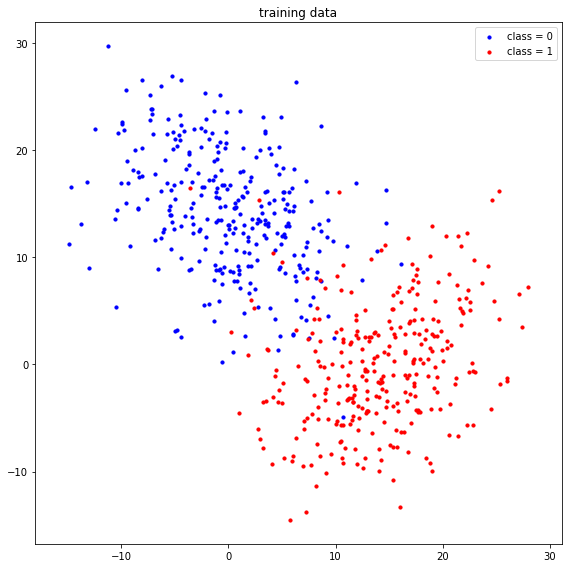

In [200]:
plot_data(point_x, point_y)

### # 02. plot the values of the model parameters $\theta_0$ in red curve, $\theta_1$ in green curve, and $\theta_2$ in blue curve over the gradient descent iterations

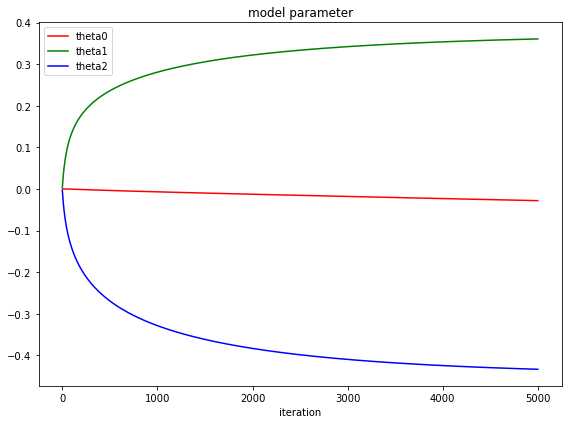

In [205]:
plot_model_parameter(theta_iteration)

### # 03. plot the loss values $\mathcal{L}(\theta)$ in red curve over the gradient descent iterations

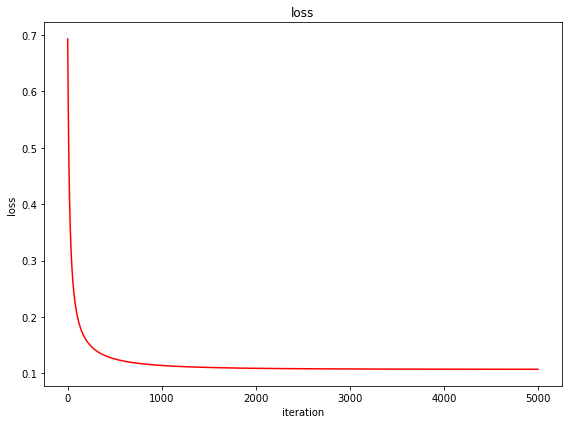

In [125]:
plot_loss_curve(loss_iteration)

### # 04. plot the classifier with the given data points superimposed

<ipython-input-303-ebaa9f5f27cf>:26: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(x_1, y_1, ellipse, cmap=cm)
<ipython-input-303-ebaa9f5f27cf>:37: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\anaconda\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


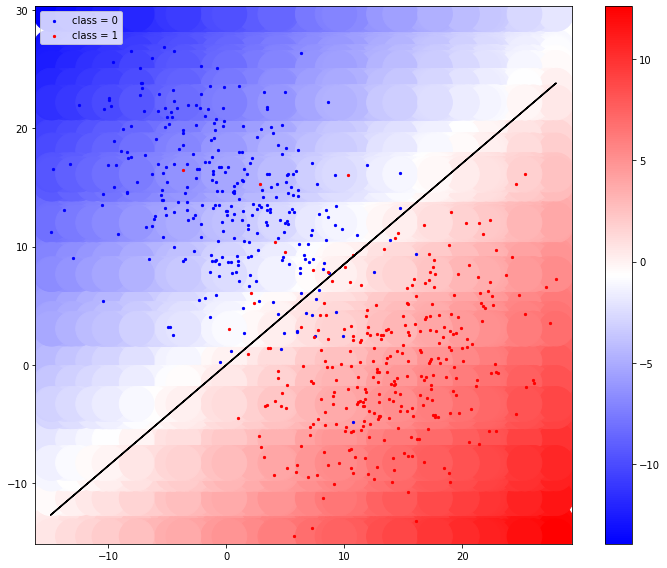

In [304]:
plot_classifier(point_x, point_y)